import matplotlib.pyplot as plt
import random
import numpy as np
plt.style.use('seaborn-whitegrid')


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import math as math

C:\Users\lucas\AppData\Local\Temp\ipykernel_10400\3714417371.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


138.0752192932029
155.4921476576612
-20.290720558422663
-8.37005019751373


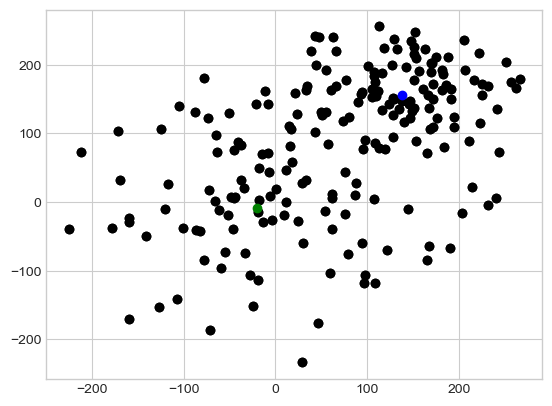

In [41]:
x = []
y = []
for i in range(0, 100):
    x += [np.random.normal(0, 100)]
    y += [np.random.normal(0, 100)]
    x += [np.random.normal(150, 60)]
    y += [np.random.normal(150, 60)]
    
for i in range(0, 200):
    plt.plot(x[i], y[i], 'o', color='black');



kx1 = 300
ky1 = 300
kx2 = -10
ky2 = -10


for j in range(0, 1000):
    avgx1 = 0;
    avgx2 = 0;
    avgy1 = 0;
    avgy2 = 0;
    count1 = 0
    count2 = 0
    
    for i in range(0, 200):
       # print(i)
        #if x[i]>200 and y[i]>200:
         #   print(x[i], y[i])
          #  print(math.sqrt((x[i]-kx1)**2+(y[i]-ky1)**2))
           # print(math.sqrt((x[i]-kx2)**2+(y[i]-ky2)**2))
             
        if math.sqrt((x[i]-kx1)**2+(y[i]-ky1)**2) < math.sqrt((x[i]-kx2)**2+(y[i]-ky2)**2):
            avgx1 += x[i]
            avgy1 += y[i]
            count1 += 1
        else:
            avgx2 += x[i]
            avgy2 += y[i]
            count2 += 1
    kx1 = avgx1/count1
    kx2 = avgx2/count2
    ky1 = avgy1/count1
    ky2 = avgy2/count2
    

    
for i in range(0, 200):
    plt.plot(x[i], y[i], 'o', color='black');
    
plt.plot(kx1, ky1, 'o', color='blue')
plt.plot(kx2, ky2, 'o', color='green')
print(kx1)
print(ky1)
print(kx2)
print(ky2)

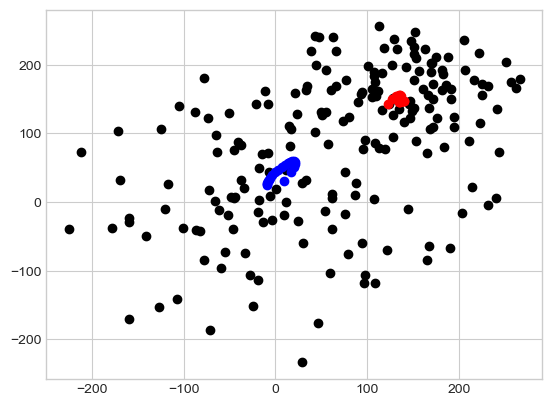

In [42]:
for i in range(0, 200):
    plt.plot(x[i], y[i], 'o', color='black');
ux1 = kx1
uy1 = ky1
ux2 = kx2
uy2 = ky2

sigx1 = 100
sigy1 = 100
sigx2 = 100
sigy2 = 100

rho1 = 0.3
rho2 = 0.3

totalProb1 = 0
totalProb2 = 0

weightedX1 = 0
weightedY1 = 0
weightedX2 = 0
weightedY2 = 0

weightedSDx1 = 0
weightedSDx2 = 0
weightedSDy1 = 0
weightedSDy2 = 0

prob1 = []
prob2 = []
for j in range(20):
    totalProb1 = 0
    totalProb2 = 0
    prob1 = []
    prob2 = []
    weightedX1 = 0
    weightedY1 = 0
    weightedX2 = 0
    weightedY2 = 0
    
    weightedSDx1 =0
    weightedSDx2 =0
    weightedSDy1 =0
    weightedSDy2 =0
    
    for i in range(200):
        wx = x[i]
        wy = y[i]
        prob1 += [1/(2*math.pi*sigx1*sigy1*math.sqrt(1-rho1**2)) * math.e**(-1/(2*(1-rho1**2))*(
                ((wx-ux1)/sigx1)**2 - 2*rho1*((wx-ux1)/sigx1)*((wy-uy1)/sigy1) + ((wy-uy1)/sigy1)**2))]
        prob2 += [1/(2*math.pi*sigx2*sigy2*math.sqrt(1-rho2**2)) * math.e**(-1/(2*(1-rho2**2))*(
                ((wx-ux2)/sigx2)**2 - 2*rho2*((wx-ux2)/sigx2)*((wy-uy2)/sigy2) + ((wy-uy2)/sigy2)**2))]
        totalProb1 += prob1[i]
        totalProb2 += prob2[i]
        
        
        # update mean
        weightedX1 += prob1[i] * wx
        weightedX2 += prob2[i] * wx 
        weightedY1 += prob1[i] * wy
        weightedY2 += prob2[i] * wy
    ux1 = weightedX1/totalProb1
    uy1 = weightedY1/totalProb1
    ux2 = weightedX2/totalProb2
    uy2 = weightedY2/totalProb2
    
    rho1 = 0
    rho2 = 0
    
    for i in range(200):
        weightedSDx1 += prob1[i] * (x[i]-ux1)**2
        weightedSDx2 += prob2[i] * (x[i]-ux2)**2
        weightedSDy1 += prob1[i] * (y[i]-uy1)**2
        weightedSDy2 += prob2[i] * (y[i]-uy2)**2

        rho1 += prob1[i]*(x[i]-ux1)*(y[i]-uy1)
        rho2 += prob2[i]*(x[i]-ux2)*(y[i]-uy2)


    sigx1 = np.sqrt(weightedSDx1 / totalProb1) # update std
    sigx2 = np.sqrt(weightedSDx2 / totalProb2)
    sigy1 = np.sqrt(weightedSDy1 / totalProb1)
    sigy2 = np.sqrt(weightedSDy2 / totalProb2)

    rho1 /= 200
    rho2 /= 200
    rho1 /= (sigx1*sigy1)
    rho2 /= (sigx2*sigy2)
    plt.plot(ux1, uy1, 'o', color = 'red')
    plt.plot(ux2, uy2, 'o', color = 'blue')




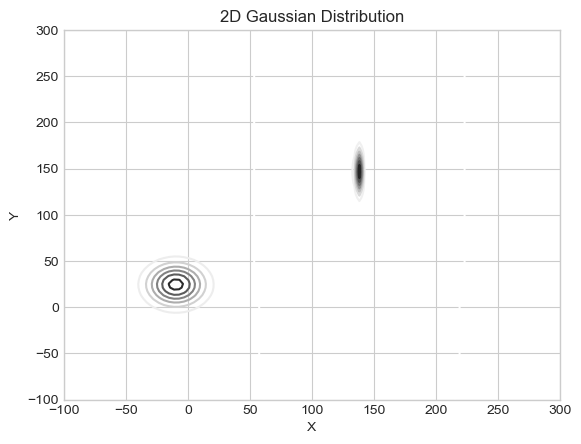

In [43]:
# Define the parameters of the 2D Gaussian distribution
mu_x = ux1    # Mean of the Gaussian along the x-axis
mu_y = uy1    # Mean of the Gaussian along the y-axis
sigma_x = sigx1   # Standard deviation of the Gaussian along the x-axis
sigma_y = sigx2   # Standard deviation of the Gaussian along the y-axis
covariance = rho1*(sigx1*sigy1)  # Covariance between the x and y axes

mu_x2 = ux2    # Mean of the Gaussian along the x-axis
mu_y2 = uy2    # Mean of the Gaussian along the y-axis
sigma_x2 = sigx2   # Standard deviation of the Gaussian along the x-axis
sigma_y2 = sigx2   # Standard deviation of the Gaussian along the y-axis
covariance2 = rho2*(sigx2*sigy2)  # Covariance between the x and y axes

# Create a grid of x and y values
x = np.linspace(-100, 300, 100)
y = np.linspace(-100, 300, 100)
X, Y = np.meshgrid(x, y)

# Compute the probability density function (PDF) values for each (x, y) coordinate
Z = np.exp(-(1/2)*((X-mu_x)**2/(sigma_x**2) + (Y-mu_y)**2/(sigma_y**2) - 2*covariance*(X-mu_x)*(Y-mu_y)/(sigma_x*sigma_y)))
Z = Z / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - covariance**2))  # Normalize the PDF

Z2 = np.exp(-(1/2)*((X-mu_x2)**2/(sigma_x2**2) + (Y-mu_y2)**2/(sigma_y2**2) - 2*covariance2*(X-mu_x2)*(Y-mu_y2)/(sigma_x2*sigma_y2)))
Z2 = Z2 / (2 * np.pi * sigma_x2 * sigma_y2 * np.sqrt(1 - covariance2**2))  # Normalize the PDF

# Create a contour plot of the 2D Gaussian distribution
plt.contour(X, Y, Z)
plt.contour(X, Y, Z2)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution')

# Display the plot
plt.show()